In [10]:
import networkx as nx
import numpy as np 
from matplotlib import pyplot as plt
import collections
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
from scipy.sparse import dok_matrix
from scipy.sparse import csgraph
import time
from scipy.spatial import KDTree
from scipy.spatial import cKDTree
from scipy.sparse.csgraph import minimum_spanning_tree
import scipy.sparse as sps
import seaborn as sns

# Runge-Kutta for Lorenz System

In [ ]:
def deriviation_step(initial_state, derivative, dt):
    """
    Compute one evaluation step
    """
    
    # evaluation of state
    state = {}
    
    if not derivative:
        state["x"] = initial_state["x"] 
        state["y"] = initial_state["y"] 
        state["z"] = initial_state["z"] 
    else:
        state["x"] = initial_state["x"] + derivative["dx"] * dt
        state["y"] = initial_state["y"] + derivative["dy"] * dt
        state["z"] = initial_state["z"] + derivative["dz"] * dt
        
    # evaluation of derivative
    derivative_next_step = {}
    
    derivative_next_step["dx"] = sigma * (state["y"] - state["x"])
    derivative_next_step["dy"] = rho * state["x"] - state["y"] - state["x"] * state["z"]
    derivative_next_step["dz"] = state["x"] * state["y"] - beta * state["z"]
    
    return derivative_next_step
    
def RK_integration(state, dt):
    """
    Runge-Kutta integration of the 4th order at a time `t` with a state `state` 
    with the step `dt`
    """
    
    # Prepare 1,2,3,4 - order derivatives for the final "best" derivative,
    # gained as 4 first elements of the Taylor's approximation
    
    # Random initialization of defivatives(probably will have to moove)
    derivative = dict({"dx": np.random.normal(),
                       "dy": np.random.normal(),
                       "dz": np.random.normal()})
    rk1 = deriviation_step(initial_state=state,
                           derivative=None,
                           dt=dt*0)
    
    rk2 = deriviation_step(initial_state=state, 
                           derivative=rk1,
                           dt=dt*0.5
                           )
    
    rk3 = deriviation_step(initial_state=state, 
                           derivative=rk2,
                           dt=dt*0.5)
    
    rk4 = deriviation_step(initial_state=state,
                           derivative=rk3,
                           dt=dt)
    
    # When all derivatives are ready, it's time to construct Rung-Kutta derivative
    # !!!! DOUBLE CHECK THE TAYLOR'S APPROXIMATIONS !!!!
    dxdt = (1 / 6) * (rk1["dx"] + 2* rk2["dx"] + 2 * rk3["dx"] + rk4["dx"])
    dydt = (1 / 6) * (rk1["dy"] + 2* rk2["dy"] + 2 * rk3["dy"] + rk4["dy"])
    dzdt = (1 / 6) * (rk1["dz"] + 2* rk2["dz"] + 2 * rk3["dz"] + rk4["dz"])
    
    state["x"] = state["x"] + dxdt * dt
    state["y"] = state["y"] + dydt * dt
    state["z"] = state["z"] + dzdt * dt
    return state

# Generating time series

In [ ]:
beta = 8 / 3
rho = 26
sigma = 10

initial_state = dict({"x": 0.62225717 ,
                   "y": -0.08232857 ,
                   "z": 30.60845379})

ode_solutions = []
for iteration in range(0, int(1e6)):
    state_t = RK_integration(initial_state, dt=0.05)
    ode_solutions.append(list(state_t.values()))
result = np.array(ode_solutions)

In [ ]:
series_26 = result[:, 0]

Text(0.5,0,'t')

<Figure size 720x2160 with 0 Axes>

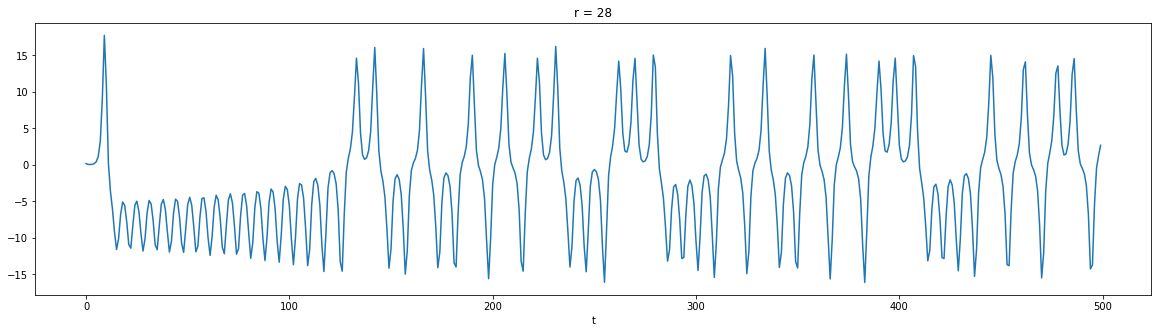

In [3]:
plt.figure(figsize=(10,30))
fig, (ax1) = plt.subplots(nrows=1)
fig.set_size_inches(20,5);
ax1.plot(series_26[:500]);
ax1.set_title("r = 28");
plt.xlabel('x')
plt.xlabel('t')


In [4]:
np.mean(series_26)

0.013179193140330663

In [6]:
np.max(series_26)

18.87310892116911

In [7]:
np.min(series_26)

-18.679133343801137

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


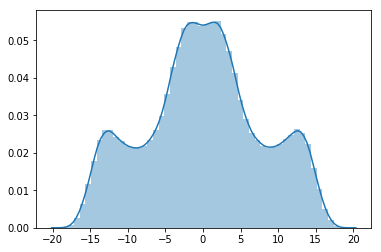

In [8]:
sns.distplot(series_26)

# Forming z-vectors

In [11]:
import json
with open('data/series.json') as fp:
    series_26 = json.load(fp)

In [3]:
from itertools import combinations
templates = combinations(range(1,10), 3)

In [4]:
# templates - dummy vectors
a = list(templates)

In [5]:
def get_indices(size=5):
    # getting indices
    inds = []
    for i in range(len(series_26)- size ):
        inds.append(np.arange(i, i + size ))
    return inds

In [6]:
# getting indices
inds = get_indices()

In [7]:
inds[1]

array([1, 2, 3, 4, 5])

In [13]:
from template import Template_5

In [18]:
t1 = Template_5(5,5,5,5)

In [19]:
vecs = t1.get_zvectors(series_26)

In [20]:
vecs, inds = vecs

In [21]:
train, train_inds = vecs[:700000], inds[:700000]

In [22]:
test_, test_inds = vecs[700000:], inds[700000:]

In [23]:
vecs[0]

array([  0.17450536,   0.42488174,  10.85671528, -11.60229627,
        -7.7901325 ])

In [28]:
# vectors from lorenz series
vecs_ = []
for item in inds:
    vecs_.append(series_26[item[0]:item[len(item)-1]+1])

In [29]:
vecs_[0]

[0.17450535575235093,
 0.05839779137295202,
 0.0440992367971854,
 0.07365239735349076,
 0.16709482839859596,
 0.42488173619505915]

In [30]:
names = [
    '3333',
    '4444',
    '6666',
    '7777',
    '8888',
    '9999',
    '10101010'
    #'2221'
]

In [31]:
params = [
    (3,3,3,3),
    (4,4,4,4),
    (6,6,6,6),
    (7,7,7,7),
    (8,8,8,8),
    (9,9,9,9),
    (10,10,10,10)
    #(2,2,2,1)
]

In [ ]:
for i in range(len(names)):
    print('Generate time series')
    p = params[i]
    t1 = Template_5(p[0],p[1],p[2],p[3])
    vecs = t1.get_zvectors(series_26)
    vecs, inds = vecs
    train, train_inds = vecs[:700000], inds[:700000]
    print('Train algo')
    test = Zahn(t1)
    components = test.fit_clusters(train)
    print(len(components))
    print('Saving')
    fname = 'fitted/zahn_' + names[i]
    with open(fname, 'wb') as fp:
        pickle.dump(test,fp)

Generate time series
Train algo
---CREATING GRAPH---
0
30
5000
150030
10000
300030
15000
450030
20000
600030
25000
750030
30000
900030
35000
1050030
40000
1200030
45000
1350030
50000
1500030
55000
1650030
60000
1800030
65000
1950030
70000
2100030
75000
2250030
80000
2400030
85000
2550030
90000
2700030
95000
2850030
100000
3000030
105000
3150030
110000
3300030
115000
3450030
120000
3600030
125000
3750030
130000
3900030
135000
4050030
140000
4200030
145000
4350030
150000
4500030
155000
4650030
160000
4800030
165000
4950030
170000
5100030
175000
5250030
180000
5400030
185000
5550030
190000
5700030
195000
5850030
200000
6000030
205000
6150030
210000
6300030
215000
6450030
220000
6600030
225000
6750030
230000
6900030
235000
7050030
240000
7200030
245000
7350030
250000
7500030
255000
7650030
260000
7800030
265000
7950030
270000
8100030
275000
8250030
280000
8400030
285000
8550030
290000
8700030
295000
8850030
300000
9000030
305000
9150030
310000
9300030
315000
9450030
320000
9600030
325000
9

415000
12450030
420000
12600030
425000
12750030
430000
12900030
435000
13050030
440000
13200030
445000
13350030
450000
13500030
455000
13650030
460000
13800030
465000
13950030
470000
14100030
475000
14250030
480000
14400030
485000
14550030
490000
14700030
495000
14850030
500000
15000030
505000
15150030
510000
15300030
515000
15450030
520000
15600030
525000
15750030
530000
15900030
535000
16050030
540000
16200030
545000
16350030
550000
16500030
555000
16650030
560000
16800030
565000
16950030
570000
17100030
575000
17250030
580000
17400030
585000
17550030
590000
17700030
595000
17850030
600000
18000030
605000
18150030
610000
18300030
615000
18450030
620000
18600030
625000
18750030
630000
18900030
635000
19050030
640000
19200030
645000
19350030
650000
19500030
655000
19650030
660000
19800030
665000
19950030
670000
20100030
675000
20250030
680000
20400030
685000
20550030
690000
20700030
695000
20850030
---CALCULATING MST---
---APPLYING AVERAGE HEURISTIC---
---CREATING CONNECTED COMPONENTS-

In [49]:
p = params[4]
t1 = Template_5(p[0],p[1],p[2],p[3])

In [25]:
from zahn import Zahn

In [26]:
test = Zahn(t1)

In [27]:
components = test.fit_clusters(train)

---CREATING GRAPH---
0
30
5000
150030
10000
300030
15000
450030
20000
600030
25000
750030
30000
900030
35000
1050030
40000
1200030
45000
1350030
50000
1500030
55000
1650030
60000
1800030
65000
1950030
70000
2100030
75000
2250030
80000
2400030
85000
2550030
90000
2700030
95000
2850030
100000
3000030
105000
3150030
110000
3300030
115000
3450030
120000
3600030
125000
3750030
130000
3900030
135000
4050030
140000
4200030
145000
4350030
150000
4500030
155000
4650030
160000
4800030
165000
4950030
170000
5100030
175000
5250030
180000
5400030
185000
5550030
190000
5700030
195000
5850030
200000
6000030
205000
6150030
210000
6300030
215000
6450030
220000
6600030
225000
6750030
230000
6900030
235000
7050030
240000
7200030
245000
7350030
250000
7500030
255000
7650030
260000
7800030
265000
7950030
270000
8100030
275000
8250030
280000
8400030
285000
8550030
290000
8700030
295000
8850030
300000
9000030
305000
9150030
310000
9300030
315000
9450030
320000
9600030
325000
9750030
330000
9900030
335000
100

In [28]:
len(components)

24024

In [29]:
import pickle 
with open('fitted/zahn_5555', 'wb') as fp:
    pickle.dump(test,fp)

In [32]:
graph = test.build_graph(train,len(train))

0
30
50000
1500030
100000
3000030
150000
4500030
200000
6000030
250000
7500030
300000
9000030
350000
10500030
400000
12000030
450000
13500030
500000
15000030
550000
16500030
600000
18000030
650000
19500030


In [33]:
X, edge_sum, edge_num = graph

In [34]:
Tcsr = minimum_spanning_tree(X)
tcopy = Tcsr.tocsr()
avg = edge_sum / edge_num

In [35]:
def apply_avg(element,avg,alpha):
    '''
    Helper function to modify it if it is less then alpha*avg
    :param avg - average edge length in graph
    :param element - item to modify
    :return modified item
    '''
    if element < alpha*avg:
        return 0
    else:
        return element

In [36]:
avg = edge_sum / edge_num
alpha = 0.162#36766
l = lambda x: apply_avg(x,avg,alpha)

In [37]:
size = len(train)
vfunc = np.vectorize(l)
tcopy.data = vfunc(tcopy.data)
tcopy_dok = dok_matrix(tcopy)
keys = list(tcopy_dok.keys())
vals = list(tcopy_dok.values())
X = dok_matrix((size,size),dtype=np.float32)
for i in range(len(keys)):
    if vals[i] > 0:
        X[keys[i][0],keys[i][1]] = vals[i]
        X[keys[i][1],keys[i][0]] = vals[i]
n_components, labels = csgraph.connected_components(X.tocsr())

In [38]:
n_components

121411

In [39]:
components = [[] for i in range(n_components)]
for i in range(size):
    components[labels[i]].append(train[labels[i]])
components = [x for x in components if len(x) > 5]

In [40]:
len(components)

27976

In [ ]:
comps = test.get_averages()

In [ ]:
len(comps)

In [ ]:
import pickle 
with open('fitted/zahn_1112', 'wb') as fp:
    pickle.dump(test,fp)

In [ ]:
import pickle 

In [ ]:
with open('fitted/zahn_1111', 'rb') as fp:
    z = pickle.load(fp)

In [ ]:
test = z

# Calculating distances

In [ ]:
ktree =  KDTree(vecs[:700000])

In [ ]:
K_nearest = 30
X = dok_matrix((700000,700000),dtype=np.float32)
edge_sum = 0
edge_num = 0

In [ ]:
%%time
for i in range(700000):
    nearest_dist, nearest_ind = ktree.query(vecs[i], k=K_nearest) 
    for j in range(len(nearest_dist)):
        edge = nearest_dist[j]
        X[i,nearest_ind[j]] = nearest_dist[j]
        X[nearest_ind[j],i] = nearest_dist[j]
        edge_sum += edge
        edge_num += 1
    if i % 10000 == 0:
        print(i)
        print(edge_num)

In [ ]:
Tcsr = minimum_spanning_tree(X)

In [ ]:
tcopy = Tcsr.tocsr()

In [ ]:
tcopy.data[:1000]

In [ ]:
import seaborn as sns

In [ ]:
sns.distplot(tcopy.data)

In [ ]:
avg = edge_sum / edge_num

In [ ]:
avg

In [ ]:
def apply_avg(element):
    if element < 0.1336766*avg:
        return 0
    else:
        return element

In [ ]:
l = lambda x: apply_avg(x)

In [ ]:
vfunc = np.vectorize(l)

In [ ]:
tcopy.data = vfunc(tcopy.data)

In [ ]:
sum(tcopy.data)

In [ ]:
tcopy_dok = dok_matrix(tcopy)

In [ ]:
keys = list(tcopy_dok.keys())
vals = list(tcopy_dok.values())

In [ ]:
X_ = dok_matrix((700000,700000),dtype=np.float32)

In [ ]:
for i in range(len(keys)):
    if vals[i] > 0:
        X_[keys[i][0],keys[i][1]] = vals[i]
        X_[keys[i][1],keys[i][0]] = vals[i]

In [ ]:
X_.tocsr()

In [ ]:
n_components, labels = csgraph.connected_components(X_.tocsr())

In [ ]:
n_components

In [ ]:
len(labels)

In [ ]:
components = [[] for i in range(n_components)]

In [ ]:
for i in range(700000):
    components[labels[i]].append(vecs[labels[i]])

In [ ]:
components = [x for x in components if len(x) > 5]

In [ ]:
len(components)

In [ ]:
def get_averages(clusters):
    comp_fifth_avg = []
    comp_four = []
    for component in test.clusters:
        comp_fifth_avg.append(np.mean([i[-1] for i in component]))
    comp = []
    for vec in component:
        comp.append(vec[:-1])
    comp_four.append(np.array(comp))
    centers = np.array([np.mean(x,axis=0) for x in comp_four])
    return comp_fifth_avg, comp_four, centers

In [ ]:
comp_fifth_avg = []
comp_four = []

In [ ]:
for component in test.clusters:
    comp_fifth_avg.append(np.mean([i[-1] for i in component]))
    comp = []
    for vec in component:
        comp.append(vec[:-1])
    comp_four.append(np.array(comp))

In [ ]:
comp_four[0]

In [ ]:
centers = [np.mean(x,axis=0) for x in comp_four]

In [ ]:
centers = np.array(centers)

In [ ]:
centers[0]

# Make predictions

Starting points

In [ ]:
from scipy.spatial import cKDTree

In [ ]:
kt = cKDTree(data=centers)

In [ ]:
series_26[700003]

In [ ]:
series_26[699999]

In [ ]:
vecs[699999]

In [ ]:
kt.query(vecs[699999][:-1])

In [ ]:
centers[9450]

In [ ]:
preds = list(series_26[:700004])

In [ ]:
preds[-1]

In [ ]:
len(preds)

In [ ]:
comp_fifth_avg[0]

predictions

In [ ]:
for i in range(700000,700500):
    zvec = preds[i:i+4]
    idx = kt.query(zvec)[1]
    pred = comp_fifth_avg[idx]
    preds.append(pred)

In [ ]:
len(preds)

In [ ]:
len(series_26)

In [ ]:
test = series_26[699996:]

In [ ]:
len(test)

In [ ]:
def get_preds_n(n,comp_four,series,ktree,comp_fifth_avg):
    i = 0
    preds = []
    preds_temp = []
    while(i < 500):
        if i % n == 0 or len(preds_temp) < 4:
            if len(preds_temp) == n:
                preds_temp = []
            preds.append(series[i+4])
            preds_temp.append(series[i+4])
        else:
            zvec = np.array(preds[i - 4 : i])
            ind = ktree.query(zvec)[1]
            pred = comp_fifth_avg[ind]
            preds.append(pred)
            preds_temp.append(pred)
        i += 1
    return preds

In [ ]:
preds = get_preds_n(55,comp_four,test,kt,comp_fifth_avg)

In [ ]:
len(test[4:5004])

In [ ]:
len(comp_fifth_avg)

In [ ]:
fig, [ax1, ax2] = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,5);
ax1.plot(preds);
ax2.plot(series_26[700000:700500]);
ax1.set_title("preds");
ax2.set_title("r = 26");

In [ ]:
plt.figure(figsize=(40,20))
plt.plot([i for i in range(500)], preds[:500], label='preds')
plt.plot([i for i in range(500)], series_26[700000:700500], label='series26')
plt.title('Preds vs original data')
plt.ylabel('value')
plt.xlabel('i')
plt.legend()
plt.show()

In [ ]:
def mse(true,pred):
    mse_ = 0
    for i in range(len(true)):
        mse_ += (true[i]-pred[i])**2
    return mse_/len(true)

In [ ]:
mse(series_26[700000:700100],preds[:100])

In [ ]:
errors = []
ks = []
k = 0
for i in range(4,24):
    err = abs(series_26[700000+i]-preds[i])
    errors.append(err)
    ks.append(k)
    k+=1

In [ ]:
errors = np.log(np.array(errors))

In [ ]:
ks = np.array(ks).reshape(20,1)

In [ ]:
errors.shape

In [ ]:
np.linalg.lstsq(ks, errors, rcond=None)[0]

In [ ]:
errors

In [ ]:
mses = []
idxs = []

In [ ]:
for i in range(2,20):
    mse_ = mse(series_26[700000:700000 + i],preds[700000:700000 + i])
    mses.append(np.exp(np.array(mse_)))
    idxs.append(i)

In [ ]:
plt.plot(mses)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

In [ ]:
train = np.array(series_26[:700000])
test_ = np.array(series_26[700000:])

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(train.reshape(-1,1))
test_sc = scaler.transform(test_.reshape(-1,1))

In [ ]:
X_train = train_sc[:-1]
y_train = train_sc[1:]
X_test = test_sc[:-1]
y_test = test_sc[1:]

In [ ]:
y_train.shape

In [ ]:
X_train.shape

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

In [ ]:
nn_preds = [nn_model.predict(X_test[0])]
for i in range(249):
    nn_preds.append(nn_model.predict(nn_preds[i]))

In [ ]:
nn_preds = np.array(nn_preds)
nn_preds = nn_preds.reshape(250,1)

In [ ]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

In [ ]:
plt.plot([i for i in range(250)], nn_preds, label='preds')
plt.plot([i for i in range(250)], y_test[:250], label='series26')
plt.title('Preds vs original data')
plt.ylabel('value')
plt.xlabel('i')
plt.legend()
plt.show()